In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
E=[]
measured=[]
measured_error=[]

known=[]
known_error=[]

f=open('murho-measured.txt','r')
for line in f.readlines():
    line = line.strip().split()
    nrg=float(line[0])
    mval=float(line[1])
    merr=float(line[2])
    
    E.append(nrg)
    measured.append(mval)
    measured_error.append(merr)
    
f.close()

g=open('murho-known.txt','r')
for line in g.readlines():
    line = line.strip().split()
    kval = float(line[1])
    kerr = 0.025*kval
    
    known.append(kval)
    known_error.append(kerr)
    
g.close()
print(known_error)


zero = np.zeros(len(E))
chisq_tot = 0
chisq_ind = []
diff=[]
N=0

for i in range(len(known)):
    N=N+1
    
    res=measured[i]-known[i]
    diff.append(res)
    ersq = measured_error[i]**2+known_error[i]**2
    
      
    chisq = res**2/ersq
    
    chisq_ind.append(chisq)
    
    chisq_tot = chisq_tot + chisq
    
print("chisq: "+str(chisq_tot))
print("chisq/N :"+str(chisq_tot/N))
print(chisq_ind)



[0.011110000000000002, 0.0091525, 0.00664, 0.0057775000000000005, 0.0025875, 0.001489, 0.0013610000000000002]
chisq: 25.75332515633099
chisq/N :3.679046450904427
[1.4746866102724117, 2.7270590206211334, 3.4695203653049456, 6.603084551656943, 5.090319957109671, 4.538716912393896, 1.8499377389719902]


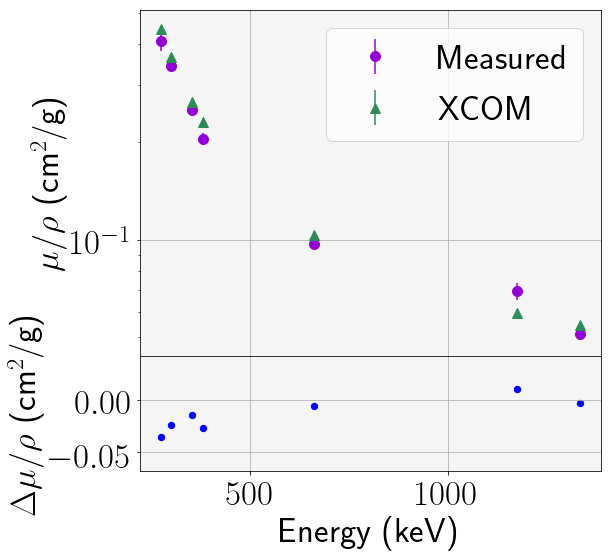

In [52]:
plt.rc('text', usetex=True)


fig1=plt.figure(figsize=(8,8))

frame1=fig1.add_axes((.1,.3,.8,.6))

frame1.errorbar(E,measured,yerr=measured_error,fmt='o',markersize=10,ls='none',color='darkviolet',label='Measured')
frame1.errorbar(E,known,yerr=known_error,fmt='^',markersize=10,ls='none',color='seagreen',label='XCOM')
frame1.set_yscale('log')
frame1.set_xlabel("Energy (keV)",fontsize=35)
frame1.set_ylabel(r"$\mu/\rho$ (cm$^2$/g)",fontsize=35)
frame1.tick_params(axis='x',labelsize=35)
frame1.tick_params(axis='y',labelsize=35)
frame1.legend(loc='best',fontsize=35)
frame1.set_facecolor('whitesmoke')
plt.grid()

                     
frame2=fig1.add_axes((.1,.1,.8,.2)) 
frame2.scatter(E,diff,color="b",s=40)
frame2.set_xlabel("Energy (keV)",fontsize=35)
frame2.set_ylabel(r"$\Delta\mu/\rho$ (cm$^2$/g)",fontsize=35)
frame2.tick_params(axis='x',labelsize=35)
frame2.tick_params(axis='y',labelsize=35) 
frame2.set_facecolor('whitesmoke')
plt.grid()          

                     

plt.savefig('murho-comp-with-res.png', bbox_inches = "tight")
plt.savefig('murho-comp-with-res.pdf', bbox_inches = "tight")

chisq: 25.75332515633099
chisq/N :3.679046450904427
[1.4746866102724117, 2.7270590206211334, 3.4695203653049456, 6.603084551656943, 5.090319957109671, 4.538716912393896, 1.8499377389719902]


(-0.05, 0.05)

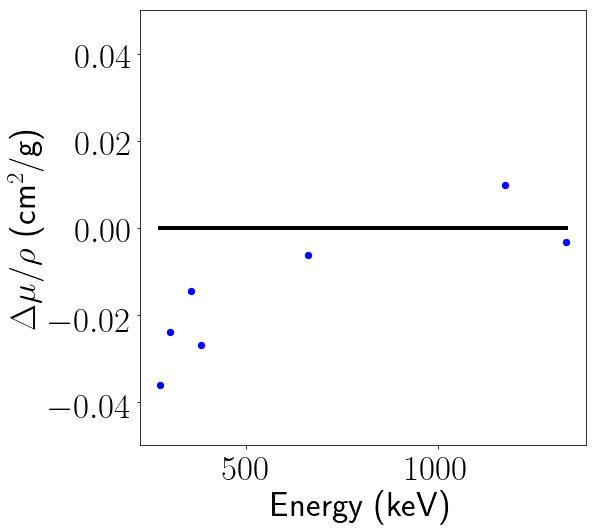

In [48]:
zero = np.zeros(len(E))
chisq_tot = 0
chisq_ind = []
diff=[]
N=0

for i in range(len(known)):
    N=N+1
    
    res=measured[i]-known[i]
    diff.append(res)
    ersq = measured_error[i]**2+known_error[i]**2
    
      
    chisq = res**2/ersq
    
    chisq_ind.append(chisq)
    
    chisq_tot = chisq_tot + chisq
    
print("chisq: "+str(chisq_tot))
print("chisq/N :"+str(chisq_tot/N))
print(chisq_ind)

fig1=plt.figure(figsize=(8,8))
plt.scatter(E,diff,color="b",s=40)
plt.plot(E,zero,lw=4,color='k')
plt.xlabel("Energy (keV)",fontsize=35)
plt.ylabel(r"$\Delta\mu/\rho$ (cm$^2$/g)",fontsize=35)
plt.tick_params(axis='x',labelsize=35)
plt.tick_params(axis='y',labelsize=35)
plt.ylim((-0.05,0.05))


